# ASTR 211 - HW03 - Sadie Seddon-Stettler

In [1]:
import numpy as np
 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
from codes.plot_utils import plot_histogram
from codes.plot_utils import plot_2d_dist
plot_pretty(fontsize=12)

from codes.histtools import shimazaki_shinomoto_rule
from codes.histtools import knuth_bin_width

from astropy.io import fits

In [2]:
hdulist = fits.open('data/sdss_galaxies.fits') 
data = np.asarray(hdulist[1].data)

In [3]:
print(data.dtype)

(numpy.record, [('objid', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('g', '>f4'), ('r', '>f4'), ('z', '>f4')])


## Task 1a

In [4]:
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))

In [5]:
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
gr = gr[(gr > 0) & (gr < 1.3)]

In [6]:
print(np.size(gr))
print(gr.min(), gr.max())

48099
0.00013923645 1.2980251


Histogram with integer bins:

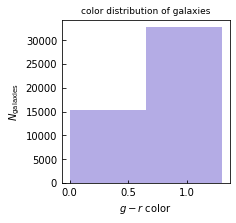

In [7]:
plot_histogram(gr, bins=2, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

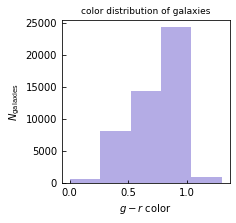

In [8]:
plot_histogram(gr, bins=5, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

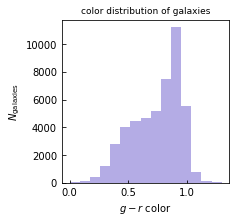

In [9]:
plot_histogram(gr, bins=15, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

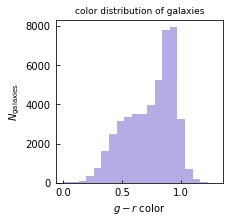

In [10]:
plot_histogram(gr, bins=20, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

Filtering to only values between 0 and 2 allows us to see the distribution much more clearly. Then, changing the number of bins allows us to see the shape of the distribution much more clearly - what is simply a lopsided peak at 2 or 5 bins turns into an interesting shape at 15 or 20 bins.

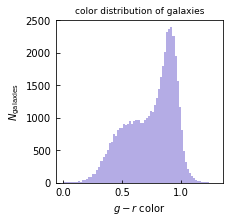

In [11]:
plot_histogram(gr, bins='auto', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

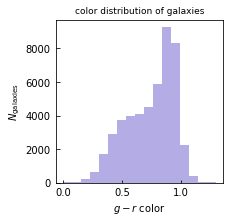

In [12]:
plot_histogram(gr, bins='sturges', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

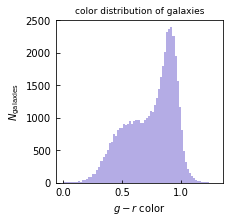

In [13]:
plot_histogram(gr, bins='fd', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

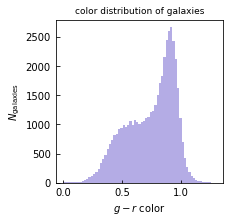

In [14]:
plot_histogram(gr, bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

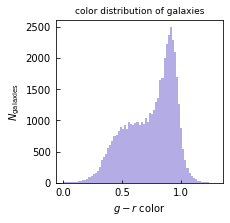

In [15]:
plot_histogram(gr, bins='rice', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

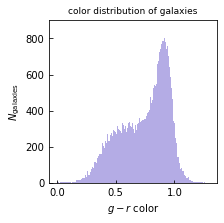

In [16]:
plot_histogram(gr, bins='sqrt', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

Again we see that the type of bins used changes the shape of the distribution, but this time much less drastically. All of the choices produce this similar two-peaked shape, but with different levels of noise. 'sturges' produces a very chunky plot, with few bins, whereas 'sqrt' produces a plot with many many small fluctuations visible. 'rice', 'scott', 'fd', and 'auto' all produce fairly similar looking distributions.

## Task 1b

In [17]:
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))

mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
mr = mr[(gr > 0) & (gr < 1.3)]
gr = gr[(gr > 0) & (gr < 1.3)]

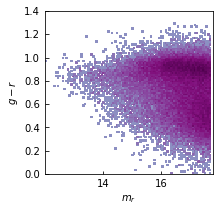

In [18]:
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

In [19]:
zmin, zmax = 0.01, 0.05
rmin, rmax = 15, 17
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))

mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
mr = mr[(gr > 0) & (gr < 1.3)]
gr = gr[(gr > 0) & (gr < 1.3)]

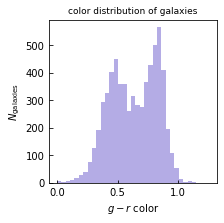

In [20]:
plot_histogram(gr, bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

For (0.01 < z < 0.05) and (15 < r < 17) we can see a new shape emerge, of a two-peaked distribution. (You can narrow r as well, but it makes the bins wider and thus harder to see the two peaks). Examining the 2D histogram mesh distribution gives us some insight as to why - when mr gets far enough to the right (nearer to 16 or 17), there is visible a 2-peak shape (the two areas of darker purple color). Then it's just a matter of tuning the z value to make that distribution visible, and narrowing it to 0.03 plus or minus 0.02 narrows it enough for us to see the two-peak shape.

## Task 1c

In [21]:
nss, hss = shimazaki_shinomoto_rule(gr, Nbmin=4, Nbmax=500)
print("number of bins according to Shimazaki-Shinomoto method is %d"%nss)

number of bins according to Shimazaki-Shinomoto method is 55


In [22]:
h_knuth, bins_knuth = knuth_bin_width(gr, return_bins=True)
n_knuth = np.shape(bins_knuth)[0] - 1
print("number of bins according to Knuth method is %d"%n_knuth)

Optimization terminated successfully.
         Current function value: -3407.894370
         Iterations: 16
         Function evaluations: 47
number of bins according to Knuth method is 37


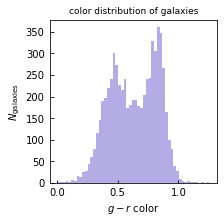

In [23]:
plot_histogram(gr, bins=nss, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

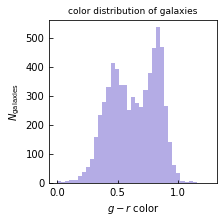

In [24]:
plot_histogram(gr, bins=n_knuth, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

For the same subsection of z and r values, using Knuth and Shimazaki-Shinomoto methods still show the two-peak distribution, looking almost identical to the scott binning method. Which is interesting, given that the number of bins calculated by Shimazaki-Shinomoto is 55 and Knuth is 37. This suggests to me that, at least for (0.01 < z < 0.05) and (15 < r < 17), the two-peak structure is actually real.

## Task 1d